# Setting things up

In [2]:
def naive(A):
    """ find (i, j) maximizing A[i] + ... + A[j] """

    curr_val = 0
    curr_ans = (None, None)
    n = len(A)

    for i in range(0, n):
        for j in range(i+1, n):
            aux = sum(A[x] for x in range(i, j+1))
            if aux > curr_val:
                curr_val = aux
                curr_ans = (i, j)
            
    return curr_val

def preprocessing(A):
    """ find (i, j) maximizing A[i] + ... + A[j] """

    curr_val = 0
    curr_ans = (None, None)
    n=len(A)

    # compute B[i] = A[0] + .. + A[i-1] 
    B = [None] * (n+1)
    B[0] = 0
    for i in range(0, n):
        B[i+1] = B[i] + A[i]
    for i in range(0, n):
        for j in range(i+1, n):
            aux = B[j + 1] - B[i]
            if aux > curr_val:
                curr_val = aux
                curr_ans = (i, j)

    return curr_val


def reuse_computation(A):
    """ find (i, j) maximizing A[i] + ... + A[j] """

    curr_val = 0
    curr_ans = (None, None)
    n=len(A)

    # compute B[i] = A[0] + .. + A[i-1] 
    B = [None] * (n+1)
    B[0] = 0
    for i in range(0, n):
        B[i+1] = B[i] + A[i]

    #compute C[i]=maxB[j] fori<j≤n 
    C = [None] * (n + 1)
    C[n] = (B[n], n)
    for i in range(n-1, -1, -1):
        if B[i] > C[i+1][0]:
            C[i] = (B[i], i)
        else:
            C[i] = C[i+1]

    for i in range(0, n):
        aux = C[i][0] - B[i]
        if aux > curr_val:
            curr_val, curr_ans = aux, (i, C[i][1])

    return curr_val

In [3]:
import random
import matplotlib.pyplot as plt
from time import time
import seaborn as sns


def random_instance(n):
    """ creates random instance of size n """
    a= [-1,0,1]
    b=[]
    for i in range(n):
        b.append(random.choice(a))

    return b


'''def capped_function_timer(instances, function, time_bound = 2):
    """ returns function on instances, but stops once it takes more than time_bound """

    answer = []
    for x in instances:
        start = time()
        function(x)
        elapsed = time() - start
        answer.append(elapsed)        
        if elapsed > time_bound:
            break

    return answer
    


def plot_consecutive_ratios(sizes, runtimes, plotcolor='blue'):

    ratios = []
    for i in range(1,len(runtimes)):
        ratios.append(runtimes[i] / runtimes[i-1])

    x = sizes[1:len(runtimes)]
    y = ratios 
    plt.scatter(x,y,color=plotcolor)
    plt.xscale('log')
    plt.xlabel('size of instance')
    plt.ylabel('T(2n)/T(n)')
    plt.xlim((2, 2 * max(sizes)))

def plot_runtimes(sizes, runtimes):

    x = sizes[0:len(runtimes)]
    y = runtimes
    plt.scatter(x,y)
    plt.xlabel('size of instance')
    plt.ylabel('ratio of runtimes')'''

'def capped_function_timer(instances, function, time_bound = 2):\n    """ returns function on instances, but stops once it takes more than time_bound """\n\n    answer = []\n    for x in instances:\n        start = time()\n        function(x)\n        elapsed = time() - start\n        answer.append(elapsed)        \n        if elapsed > time_bound:\n            break\n\n    return answer\n    \n\n\ndef plot_consecutive_ratios(sizes, runtimes, plotcolor=\'blue\'):\n\n    ratios = []\n    for i in range(1,len(runtimes)):\n        ratios.append(runtimes[i] / runtimes[i-1])\n\n    x = sizes[1:len(runtimes)]\n    y = ratios \n    plt.scatter(x,y,color=plotcolor)\n    plt.xscale(\'log\')\n    plt.xlabel(\'size of instance\')\n    plt.ylabel(\'T(2n)/T(n)\')\n    plt.xlim((2, 2 * max(sizes)))\n\ndef plot_runtimes(sizes, runtimes):\n\n    x = sizes[0:len(runtimes)]\n    y = runtimes\n    plt.scatter(x,y)\n    plt.xlabel(\'size of instance\')\n    plt.ylabel(\'ratio of runtimes\')'

# Run doubling experiments

In [4]:
sizes = [ 2**i for i in range(1, 20)]
print(sizes)

[2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]


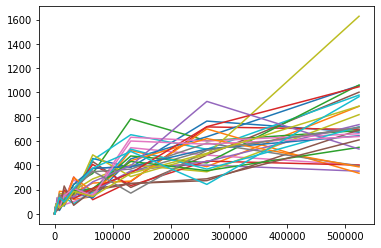

In [11]:
t=0

while t<30:
    empty=[]
    instances = [ random_instance(n) for n in sizes ]
    for i in instances:
        max_value =reuse_computation(i)
        empty.append([len(i), max_value])
    plt.plot([x[0] for x in empty],[x[1] for x in empty])
    t+=1
    
plt.show()


In [ ]:
naive_times = capped_function_timer(instances, naive)

In [ ]:
preprocessing_times = capped_function_timer(instances, preprocessing)

In [ ]:
reuse_times = capped_function_timer(instances, reuse_computation)

# Plot consecutive ratios of T

If $T(n) = \Theta(n^d)$ then $T(2n)/T(n) \rightarrow 2^d$ as $n \rightarrow \infty$

In [ ]:
plot_consecutive_ratios(sizes, naive_times)

In [ ]:
plot_consecutive_ratios(sizes, preprocessing_times)

In [ ]:
plot_consecutive_ratios(sizes, reuse_times)

## Guess complexity and plot T(n) / f(n)

If $T(n) = \Theta(f(n))$ then $T(n) / f(n) \rightarrow c$ as $n \rightarrow \infty$ where $c > 0$ is a constant. 

Below we analyze the empirical behaviour of the pre-processing algorithm by comparing it to three guesses:
- linear
- quadratic
- cubic

In [ ]:
guess = lambda n: n
ratios_linear =[T_n / guess(n) for (n, T_n) in zip(sizes, preprocessing_times)]
plt.xlabel('log n')
plt.ylabel('T(n) / n')
plt.plot(ratios_linear)


In [ ]:
guess = lambda n: n**2
ratios_quadratic = [T_n / guess(n) for (n, T_n) in zip(sizes, preprocessing_times)]
plt.xlabel('log n')
plt.ylabel('T(n) / n^2')
plt.plot(ratios_quadratic)

In [ ]:
guess = lambda n: n**3
ratios_cubic = [T_n / guess(n) for (n, T_n) in zip(sizes, preprocessing_times)]
plt.plot(ratios_cubic)